In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%time
df_ago_sep = pd.read_csv('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data_Final/Pico_placa/pico_placa_ago_sep_HF.csv', sep=";")
df_oct = pd.read_csv('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data_Final/Pico_placa/pico_placa_oct_HF.csv', sep=";")
df_tipo_dia = pd.read_csv('/content/drive/My Drive/Team 80 DS4A/Secretaría de Movilidad - SGV/Data_Final/Pico_placa/Tipodia_HF.csv', sep=";")
df_total = df_ago_sep.append(df_oct)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.63 µs


In [4]:
df_total.head()

,Jornada,Corredor,tid,Tramo,Sentido,Volumen,Fecha,Velocidad
0,PM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,325,2020-08-03,43.878331
1,AM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,168,2020-08-03,47.911996
2,PM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,264,2020-08-03,47.506835
3,AM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,202,2020-08-03,52.084691
4,PM,Autopista Norte,1002021,AUTONORTE - CARDIO.INFANTILCL146,NS,253,2020-08-03,50.053515


In [5]:
df_tipo_dia.head()

,Fecha,Nombredia,Tipodia
0,2020-08-01,Sabado,Festivo
1,2020-08-02,Domingo,Festivo
2,2020-08-03,Lunes,Habil
3,2020-08-04,Martes,Habil
4,2020-08-05,Miercoles,Habil


In [6]:
dfF = df_total.merge(df_tipo_dia, left_on='Fecha', right_on='Fecha')
dfF.head()

,Jornada,Corredor,tid,Tramo,Sentido,Volumen,Fecha,Velocidad,Nombredia,Tipodia
0,PM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,325,2020-08-03,43.878331,Lunes,Habil
1,AM,Autopista Norte,1002018,AUTONORTE - ALCALACL146,SN,168,2020-08-03,47.911996,Lunes,Habil
2,PM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,264,2020-08-03,47.506835,Lunes,Habil
3,AM,Autopista Norte,1002017,AUTONORTE - ALCALAPRADO,NS,202,2020-08-03,52.084691,Lunes,Habil
4,PM,Autopista Norte,1002021,AUTONORTE - CARDIO.INFANTILCL146,NS,253,2020-08-03,50.053515,Lunes,Habil


In [7]:
dfF["Fecha"] = dfF["Fecha"].astype("datetime64")
dfF["Velocidad"] = dfF["Velocidad"].astype("float64")
dfF["Jornada"] = dfF["Jornada"].astype("str")
dfF.dtypes

Jornada              object
Corredor             object
tid                   int64
Tramo                object
Sentido              object
Volumen               int64
Fecha        datetime64[ns]
Velocidad           float64
Nombredia            object
Tipodia              object
dtype: object

In [8]:
dfF = dfF.loc[dfF["Tipodia"] == 'Habil']
df_speed = dfF.groupby("Fecha", as_index=False).mean()["Velocidad"]
df_speed

0     31.178677
1     30.987343
2     30.874177
3     30.604460
4     30.042883
        ...    
57    29.740386
58    28.009624
59    28.961673
60    28.944924
61    28.299688
Name: Velocidad, Length: 62, dtype: float64

In [9]:
df_volume = dfF.groupby("Fecha", as_index=False).mean()["Volumen"]
df_volume

0     118.598214
1     123.036982
2     127.498521
3     127.952663
4     120.596154
         ...    
57    120.305638
58    120.030882
59    124.228972
60    127.187888
61    124.230650
Name: Volumen, Length: 62, dtype: float64

<h1>Polinomial Regression using scikit-learn</h1>

In [10]:
pol_degree = 3
y_speed = df_speed.values
x = df_speed.index.values.reshape(-1,1)
transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
transformer.fit(x)
xp = transformer.transform(x)
model = LinearRegression().fit(xp, y_speed)
y_pred_speed = model.predict(xp)

y_volume = df_volume.values
x = df_volume.index.values.reshape(-1,1)
transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
transformer.fit(x)
xp = transformer.transform(x)
model = LinearRegression().fit(xp, y_volume)
y_pred_volume = model.predict(xp)

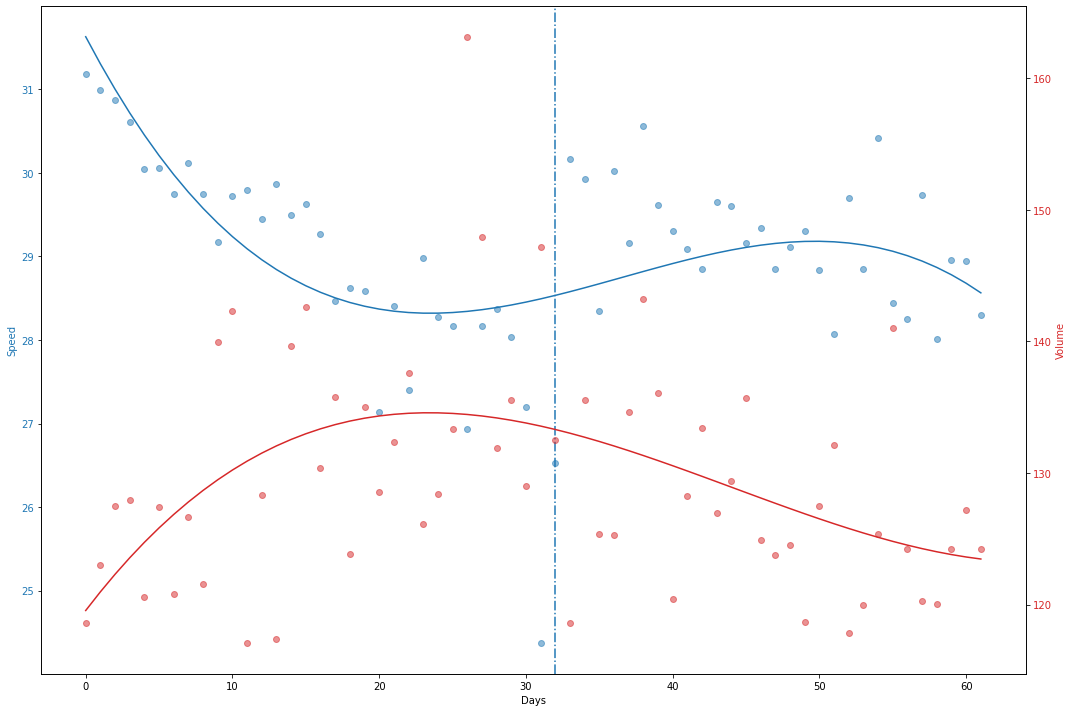

In [14]:
fig, ax1 = plt.subplots(figsize=(15, 10))

color = 'tab:blue'
ax1.set_xlabel('Days')
ax1.set_ylabel('Speed', color=color)
ax1.scatter(x, y_speed, alpha=0.5, color=color)
ax1.plot(x, y_pred_speed, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.axvline(x=32, linestyle='dashdot')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Volume', color=color)
ax2.scatter(x, y_volume, alpha=0.5, color=color)
ax2.plot(x, y_pred_volume, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

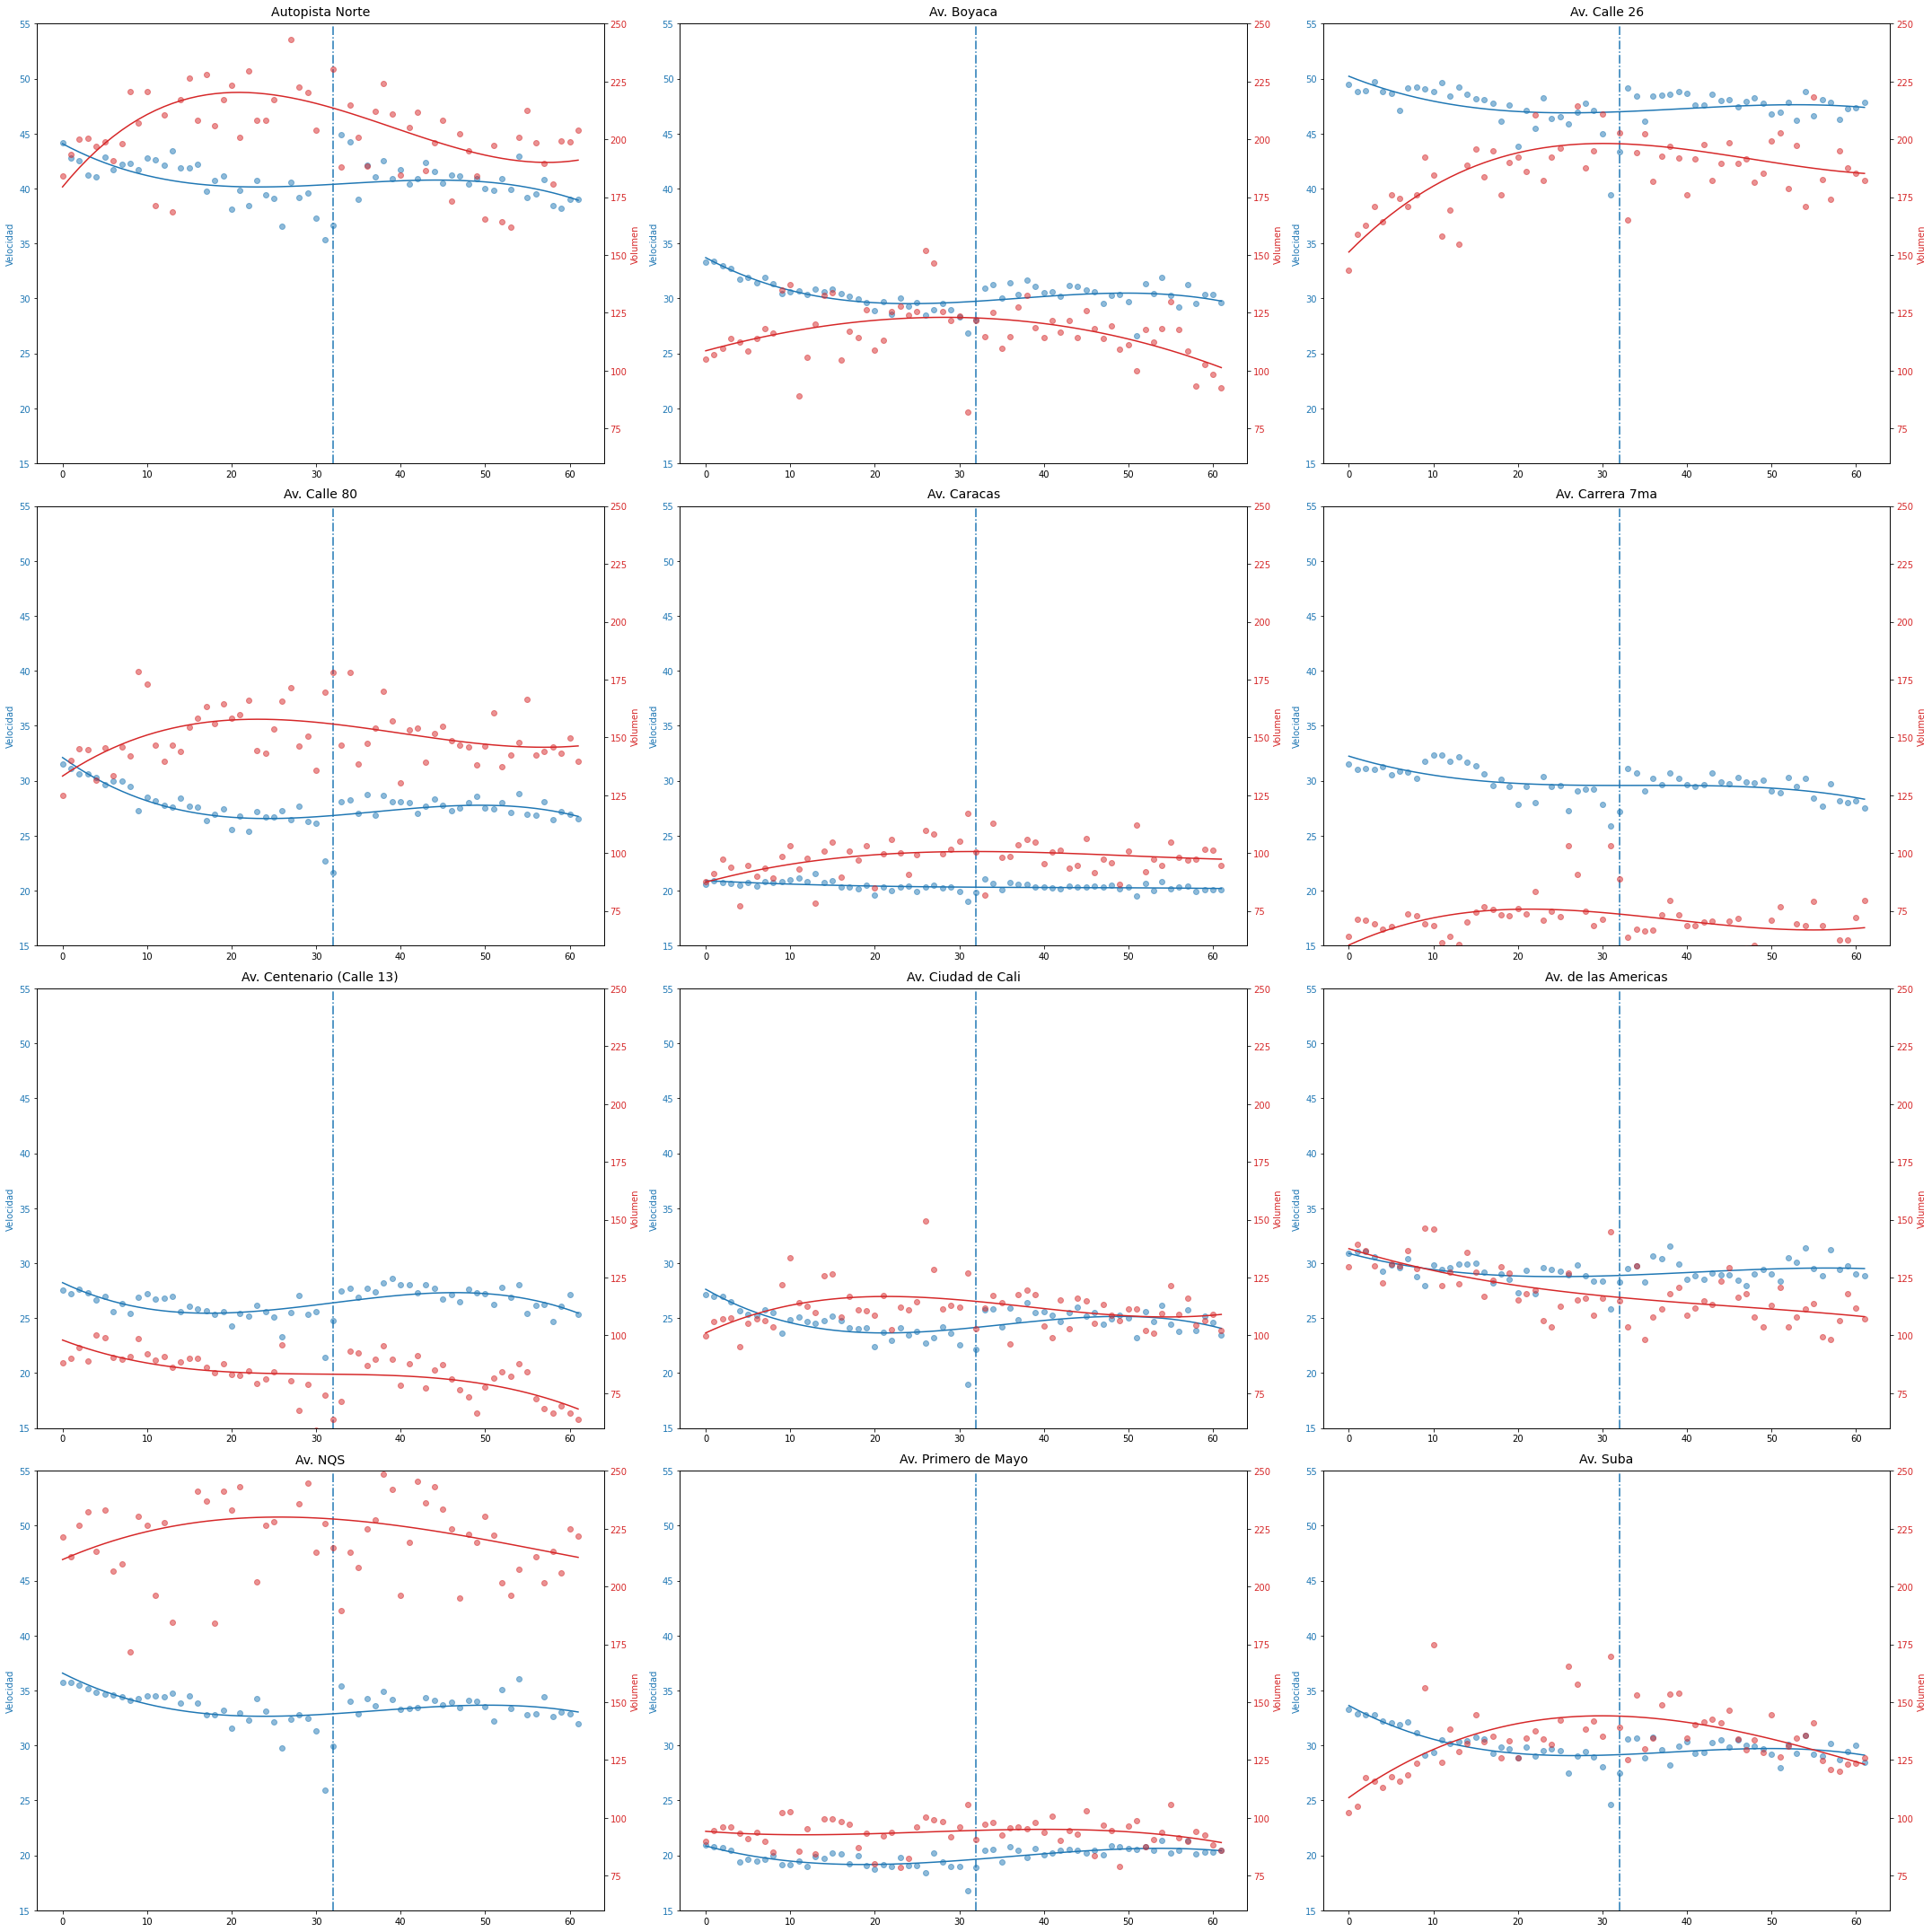

In [28]:
corredor = ["Autopista Norte", "Av. Boyaca", "Av. Calle 26", "Av. Calle 80", "Av. Caracas", "Av. Carrera 7ma", 
            "Av. Centenario (Calle 13)", "Av. Ciudad de Cali", "Av. de las Americas", "Av. NQS", "Av. Primero de Mayo", "Av. Suba"]

fig, ax1 = plt.subplots(4,3, figsize=(30,30))

for i in range(len(corredor)):
  df_cor = dfF.loc[dfF["Corredor"] == corredor[i]]  
  df_cor_speed = df_cor.groupby("Fecha", as_index=False).mean()["Velocidad"]
  df_cor_volume = df_cor.groupby("Fecha", as_index=False).mean()["Volumen"]

  y_cor_speed = df_cor_speed.values
  x_cor_speed = df_cor_speed.index.values.reshape(-1,1)

  transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
  transformer.fit(x_cor_speed)
  xp = transformer.transform(x_cor_speed)
  model = LinearRegression().fit(xp, y_cor_speed)
  y_cor_pred_speed = model.predict(xp)

  y_cor_volume = df_cor_volume.values
  x_cor_volume = df_cor_volume.index.values.reshape(-1,1)
  transformer = PolynomialFeatures(degree=pol_degree, include_bias=False)
  transformer.fit(x_cor_volume)
  xp = transformer.transform(x_cor_volume)
  model = LinearRegression().fit(xp, y_cor_volume)
  y_cor_pred_volume = model.predict(xp)

  color = 'tab:blue'
  absc = int(i/3)
  orde = int(i%3)
  ax1[absc, orde].set_ylim([15, 55])  
  #ax1[absc, orde].set_xlabel('Days')
  ax1[absc, orde].set_ylabel('Velocidad', color=color)
  ax1[absc, orde].scatter(x_cor_speed, y_cor_speed, alpha=0.5, color=color)
  ax1[absc, orde].plot(x_cor_speed, y_cor_pred_speed, color=color)
  ax1[absc, orde].tick_params(axis='y', labelcolor=color)
  ax1[absc, orde].axvline(x=32, linestyle='dashdot')

  ax2 = ax1[absc, orde].twinx()
  ax2.set_ylim([60, 250])  
  color = 'tab:red'
  ax2.set_ylabel('Volumen', color=color)
  ax2.scatter(x_cor_volume, y_cor_volume, alpha=0.5, color=color)
  ax2.plot(x_cor_volume, y_cor_pred_volume, color=color)
  ax2.tick_params(axis='y', labelcolor=color)
  plt.title(corredor[i], fontsize=14, verticalalignment='bottom')
  fig.tight_layout()

fig.savefig('SpeedVolume.png')